In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("breast_cancer.csv")

In [5]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [6]:
data[data.malignant == 1]

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
5,5,1017122,8,10,10,8,7,10,9,7,1,1
12,12,1041801,5,3,3,3,2,3,4,4,1,1
14,14,1044572,8,7,5,10,7,9,5,5,4,1
15,15,1047630,7,4,6,4,6,1,4,3,1,1
18,18,1050670,10,7,7,6,4,10,4,1,2,1
20,20,1054590,7,3,2,10,5,10,5,4,4,1
21,21,1054593,10,5,5,3,6,7,7,10,1,1
23,23,1057013,8,4,5,1,2,-1,7,3,1,1
25,25,1065726,5,2,3,4,2,7,3,6,1,1
32,32,1072179,10,7,7,3,8,5,7,4,3,1


In [7]:
data.columns

Index([u'Unnamed: 0', u'id number', u'clump_thickness',
       u'uniformity_of_cell_size', u'uniformity_of_cell_shape',
       u'marginal_adhesion', u'epithelial_cell_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

In [8]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [9]:
data.columns

Index([u'clump_thickness', u'uniformity_of_cell_size',
       u'uniformity_of_cell_shape', u'marginal_adhesion',
       u'epithelial_cell_size', u'bare_nuclei', u'bland_chromatin',
       u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

In [10]:
y = data.pop("malignant")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

# GRID Search

In [12]:

n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,4]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,max_features=max_features,min_samples_split=min_samples_split)
                              , cv=None, n_jobs=-1)

In [14]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [15]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
best_rfc = estimator.best_estimator_

# Accuracy

In [17]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.971428571429


In [18]:
y_hat = best_rfc.predict(X_test)

In [19]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [20]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

In [21]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.971428571429


# Precision and Recall

In [22]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



# Here, Precision is the percentage of the breast cancer is mallignant in the patients.
Recall is the percentage where the patient's had malignant breast cancer among all the malignant cases

Precision: the model identifies 96% patients of breast cancer being maligant and 4% patients of non breast cancer as a breast cancer.
Recall: the model identifies 96% patients that actually have breast cancer 





In [23]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 2 43]]


Number of true positives for the number of patients have breast cancer which is malignant(tp) = 43
Number of false positives for the number of patients have breast cancer which is malignant(fp) = 2
Number of true negatives for the number of patients have breast cancer which is malignant(fn)= 2

Precision = tp/tp+fp
Precision: 43 / 43 + 2 = .96

Recall = tp/tp+fn
Recall: 43 / 43 + 2 = .96

# AUC

In [24]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.996140350877


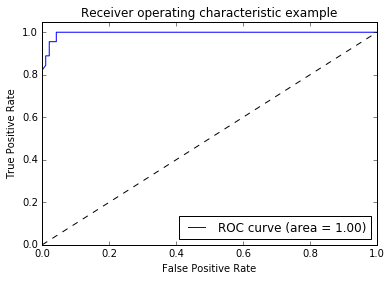

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

K-Fold Cross Validation

1. Implement K-Fold Cross Validation, with 10 folds, on your Breast Cancer Model

In [30]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [31]:
scores

array([ 0.91549296,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.98550725,  1.        ])

In [32]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)

Score is 0.968671 +/-  0.020162


2.Report on how the K-Fold CV score compared to your single holdout AUC

The K-Fold Cv score is 0.970080 +/-  0.018971.That it is between 0.960039 and 0.98721

Single Holdout AUC score is: 0.996140350877.

3.AUC, Accuracy, Precision, and Recall

AUC:In this model, the breast cancer being malignat as an AUC 0.995321

Accuracy: 0.971428571429

Precision is: .96

Recall is: .96